# Model Selection and Hyperparameter Optimization

## Hyperparameter Optimization
In this notebook, I perform hyperparameter optimization on two models with the help of kFold cross validation. I do this with the help of kFold cross validation and AUROC score. Instead of performing standard kFold validation to validate a model's performance (k-1 sets for training and the 1 held out set for validation) I do the following: 

1) Import *training* data only

2) Split training data **further** into training and validation sets. This validation set will remain *untouched* for now

3) Split the training set **further** into k subsets with 1 held-out validation set (kFolds)

4) On each iteration of the kFolds technique: 
    - k-1 sets are used for training the model with hyperparameter(n)
    - 1 held-out set is used to calculate the AUROC score of the model with hyperparameter(n) 
    - Change the value of n
    
5) Choose the hyperparameter value that resulted in the highest AUROC score

6) Evaluate the model with optimized hyperparameters on the *untouched* validation set 

And so, rather than using kFold cross-validation to validate the accuracy of a single model across k subsets, I am using each subset to test the model with **different** hyperparameters. I then select the hyperparameter value which produced the highest AUROC score and retrain the model using this value. Afterwards, I validated the model's performance on the *untouched* validation set from the first split I performed on the training data (step 2). 

What this approach does:
* Prevents model overfitting by *first* performing hyperparameter optimization *then* validating the model on an untouched set 
* Model validation performed on the untouched validation set 

What this approach **does not** do: 
* Actual kFold cross validation

## Model Validation
And so, although the above steps may be misleading because I use the kFolds technique, I do not use kFold splitting to *validate* my model, but rather to test and select the optimal hyperparameter. I then perform a simple one-step validation using the set I split off in step 2.

## Model Selection and Performance Metrics
I performed the above hyperparameter optimization and validation strategies on two learning algorithms: kNearestNeighbors and Decision Trees. The metric I used to evaluate each model's performance is their AUROC scores as derived in step 6. I compared both scores and chose the model with the higher AUROC score. 

To summarize my results, I found k = 23 to be the optimal k-value for kNN, and max_depth = 7 to be optimal for my decision tree. Thinking about this now, if I wanted to optimize the models further I could repeat the same process with other hyperparameters to try to improve performance. However, I think I chose the most impactful hyperparameters to adjust because of the large variance in AUROC scores throughout my iterative testing process. 

## Result of Analysis 
The winning model turned out to be my Decision Tree, by a large gap: AUROC score of .73 compared to .63 with kNN. This is clearly visually represented by the graphed ROC curves that show the large difference in area under the curve between the two models. 

This analysis has shown me why it's so important to 1) Pick the most effective model, 2) Optimize it's hyperparameters, and 3) Evaluate its performance on a validation set. These three steps maximize your model's effectiveness, prevent overfitting, and make sure you pick the best model for the situation. I will definitely be using these techniques to compare model performance in the future. 

*Notes:*
- Because of randomized data splits, running the notebook gives slightly different values for the best hyperparameters each time. My code automatically uses the 'best' value to create the final model, and so the models' performance may vary slightly each time the notebook is ran. 
- Originally I was performing between 10 and 15 splits with the kFold technique, and evaluating 10-15 different hyperparameters. After the completion of this notebook, while writing this top portion, I had the idea that since this is such a large dataset, I could do something super large such as 100 splits. Testing 100 different hyperparameters might actually give me more optimal values than testing with 10-15, so I tried this out. Very interestingly, even testing 100 different k-values with kNN resulted in an optimal k very close to the one I found testing only 15. The same exact thing can be said about the decision tree.

*by Chinenye Ndili*

# Optimize and Validate kNN model

Validation AUROC for KNN with k = 3: 0.589577598248638
Validation AUROC for KNN with k = 5: 0.6092590324556032
Validation AUROC for KNN with k = 7: 0.6345681648339917
Validation AUROC for KNN with k = 9: 0.6109916172561848
Validation AUROC for KNN with k = 11: 0.6276619261660895
Validation AUROC for KNN with k = 13: 0.6190213815789474
Validation AUROC for KNN with k = 15: 0.6024359979101359
Validation AUROC for KNN with k = 17: 0.6122218955209252
Validation AUROC for KNN with k = 19: 0.623001638001638
Validation AUROC for KNN with k = 21: 0.6738093872635366
Validation AUROC for KNN with k = 23: 0.6449973773931288
Validation AUROC for KNN with k = 25: 0.6962209661096439
Validation AUROC for KNN with k = 27: 0.647662415517652
Validation AUROC for KNN with k = 29: 0.644810256325478
Validation AUROC for KNN with k = 31: 0.6328410550232144
Validation AUROC for KNN with k = 33: 0.6541620284477427
Validation AUROC for KNN with k = 35: 0.6247098630226552
Validation AUROC for KNN with k = 37: 0

Text(0.5, 1.0, 'kNN with k = 25')

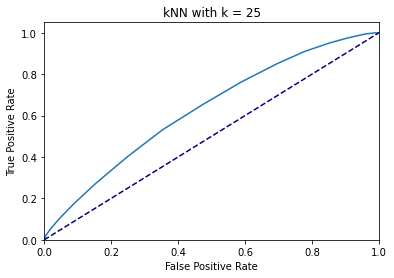

In [4]:
import numpy as np # linear algebra
import matplotlib.pylab as plt # Plotting
import sklearn # Machine learning models.
from sklearn.neighbors import KNeighborsClassifier as KNN
import sklearn.metrics # Area under ROC curve calculations. 
from sklearn.model_selection import train_test_split as tts # Train test split 
from sklearn.model_selection import KFold # KFold cross validation 
import pandas as pd # Quick dataframe previewing 



filename = '/kaggle/input/higgs-boson-detection/train.csv'


data = np.loadtxt(filename, skiprows=1, delimiter=',')

X = data[:,1:]
Y = data[:,0:1]

# Split off validation set, size = 30% validation 70% training 
Xtrain, Xvalid, Ytrain, Yvalid = tts(X, Y, test_size=.3)

# df = pd.read_csv(filename, skiprows=1)
# df.head(n=5)

# Split training set with KFoldValidation in order to perform hyperparameter optimization
kf = KFold(n_splits = 15)
kFolds = kf.split(Xtrain)

# Set 'k' in kNN algo, declare dictionary to hold AUROC scores {kval : auroc}
k = 1
aurocs = {}


# Use kFold technique on training set to test models with different values of k starting at 3
for train_index, test_index in kFolds:
    k += 2
    model = KNN(n_neighbors=k)
    model.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions = model.predict_proba(Xtrain[test_index])
    val = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions[:,1])
    print(f'Validation AUROC for KNN with k = {k}: {val}')
    aurocs[k] = val

# Choose optimized k-value and evaulate AUROC score on the untouched validation set (note: not the same validation set used in kFolds technique)
model = KNN(n_neighbors=max(aurocs, key=aurocs.get)) # Set model with optimized k-value
model.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions = model.predict_proba(Xvalid) # Predict on validation set
val = sklearn.metrics.roc_auc_score(Yvalid, predictions[:,1]) # Calculate AUROC score
print(f'Max AUROC score at k = {max(aurocs, key=aurocs.get)}. AUROC score with optimized kValue on validation set = {val}') # Print AUROC score on untouched validation set

# Plot ROC curve.
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Yvalid, predictions[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'kNN with k = {max(aurocs, key=aurocs.get)}')

# Evaluating Alternate Model 

Validation AUROC for Decision Tree with max_depth = 3: 0.6701900848724462
Validation AUROC for Decision Tree with max_depth = 5: 0.7126923862012655
Validation AUROC for Decision Tree with max_depth = 7: 0.7242857494805823
Validation AUROC for Decision Tree with max_depth = 9: 0.7429523614802699
Validation AUROC for Decision Tree with max_depth = 11: 0.7060644020337483
Validation AUROC for Decision Tree with max_depth = 13: 0.6703659539473683
Validation AUROC for Decision Tree with max_depth = 15: 0.6869244710031348
Validation AUROC for Decision Tree with max_depth = 17: 0.5901164690123819
Validation AUROC for Decision Tree with max_depth = 19: 0.6162899262899263
Validation AUROC for Decision Tree with max_depth = 21: 0.6347749858674903
Validation AUROC for Decision Tree with max_depth = 23: 0.604543666404406
Validation AUROC for Decision Tree with max_depth = 25: 0.5962818519158459
Validation AUROC for Decision Tree with max_depth = 27: 0.605131763720426
Validation AUROC for Decision T

Text(0.5, 1.0, 'Decision tree with max_depth = 9')

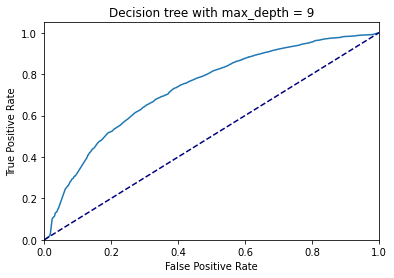

In [5]:
# Using decision tree classifier
from sklearn import tree # Decision tree algo

# Split training set with KFoldValidation
kf_two = KFold(n_splits = 10)
kFolds_two = kf_two.split(Xtrain)

# Set 'max_depth' in decision tree algo, declare dictionary to hold AUROC values {max_depth : auroc}
mdepth = 1
aurocs_two = {}


# Use kFold technique on training set to test models with different values of max_depth starting at 3
for train_index, test_index in kFolds_two:
    mdepth += 2
    model_two = tree.DecisionTreeClassifier(max_depth=mdepth)
    model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0])
    predictions_two = model_two.predict_proba(Xtrain[test_index])
    val_two = sklearn.metrics.roc_auc_score(Ytrain[test_index], predictions_two[:,1])
    print(f'Validation AUROC for Decision Tree with max_depth = {mdepth}: {val_two}')
    aurocs_two[mdepth] = val_two
    
# Choose optimized max_depth and evaulate AUROC score on the untouched validation set (note: not the same validation set used in kFolds technique)
model_two = tree.DecisionTreeClassifier(max_depth=max(aurocs_two, key=aurocs_two.get)) # Set model with optimized max_depth value
model_two.fit(Xtrain[train_index], Ytrain[train_index][:,0]) # Fit model on the training set
predictions_two = model_two.predict_proba(Xvalid) # Predict on validation set
val_two = sklearn.metrics.roc_auc_score(Yvalid, predictions_two[:,1]) # Calculate AUROC score
print(f'Max AUROC score at max_depth = {max(aurocs_two, key=aurocs_two.get)}. AUROC score with optimized kValue on validation set = {val_two}') # Print AUROC score on untouched validation set

# Plot ROC curve.
fpr_two, tpr_two, thresholds_two = sklearn.metrics.roc_curve(Yvalid, predictions_two[:,1])
plt.plot(fpr_two, tpr_two)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Decision tree with max_depth = {max(aurocs_two, key=aurocs_two.get)}')

# Make Predictions and Prepare Submission File

In [6]:
# Make probabilistic predictions.
filename = '/kaggle/input/higgs-boson-detection/test.csv' # This is the path if running on kaggle.com. Otherwise change this.
Xtest1 = np.loadtxt(filename, skiprows=1, delimiter=',', usecols=range(1,29))
predictions = model_two.predict_proba(Xtest1)
predictions = predictions[:,1:2] # Predictions has two columns. Get probability that label=1.
N = predictions.shape[0]
assert N == 50000, "Predictions should have length 50000."
submission = np.hstack((np.arange(N).reshape(-1,1), predictions)) # Add Id column.
np.savetxt(fname='submission.csv', X=submission, header='Id,Predicted', delimiter=',', comments='')

# If running on Kaggle.com, submission.csv can be downloaded from this Kaggle Notebook under Sessions->Data->output->/kaggle/working.